Trying to learn the quadratic polynomial, 

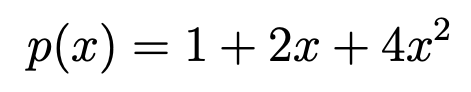

using the parametric model,

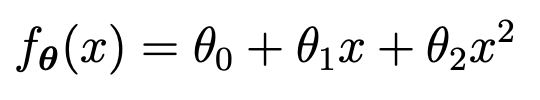

The true extact value of theta are:

theta_0 = 1

theta_1 = 2

theta_2 = 4

And the learnt values of theta are:

theta_0 = 1.0938637

theta_1 = 2.1218762

theta_2 = 4.073845

**NOTE**: This code is just for experimentation/explanation purposes for my thesis only and is not intended to be a demonstration of my coding ability.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
############################## Models ##############################

In [3]:
# Exact model (function)

def exact(x):
  return 1 + 2 * x + 4 * x**2

In [4]:
# Parametric model

class Quad_Model(keras.Model):
  def __init__(self, *args, **kwargs):
    super(Quad_Model, self).__init__(*args, **kwargs)
    self.theta_0 = tf.Variable(np.random.randn(), name = "theta_0")
    self.theta_1 = tf.Variable(np.random.randn(), name = "theta_1")
    self.theta_2 = tf.Variable(np.random.randn(), name = "theta_2")

  def call(self, x):
    return self.theta_0 + self.theta_1 * x + self.theta_2 * tf.pow(x, 2)

In [5]:
############################## Model Parameters ##############################

In [6]:
# Gaussian noise
sigma = 0.05

# Epochs
epochs = 4

# Number of data points
N = 12800

# Batch Size
batch_size = 64

In [7]:
############################## Creating Training Data ##############################

In [8]:
def creat_train_data(N, simga = 0.1):
  x_data = np.random.uniform(0.0 , 1.0, N)
  noise = np.random.normal(scale = sigma , size = N)
  y_data = exact(x_data)
  return x_data, y_data + noise

In [9]:
x_data, y_data = creat_train_data(N, sigma)

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_dataset = train_dataset.shuffle(N).batch(batch_size)

In [11]:
############################## Training ##############################

In [12]:
model = Quad_Model()

In [13]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.1)
loss_fn = tf.keras.losses.MeanSquaredError()

In [14]:
# Train over number of epochs
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch + 1}")
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            y_batch_pred = model(x_batch_train)
            loss_value = loss_fn(y_batch_pred, y_batch_train)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 50 == 0:
          print(f"Training loss (for one batch) at batch {step}: {loss_value}")


Start of epoch 1
Training loss (for one batch) at batch 0: 26.612150192260742
Training loss (for one batch) at batch 50: 0.04703747108578682
Training loss (for one batch) at batch 100: 0.009455046616494656
Training loss (for one batch) at batch 150: 0.017842557281255722

Start of epoch 2
Training loss (for one batch) at batch 0: 0.00561154680326581
Training loss (for one batch) at batch 50: 0.020930198952555656
Training loss (for one batch) at batch 100: 0.002986753126606345
Training loss (for one batch) at batch 150: 0.009120217524468899

Start of epoch 3
Training loss (for one batch) at batch 0: 0.006368954665958881
Training loss (for one batch) at batch 50: 0.010023415088653564
Training loss (for one batch) at batch 100: 0.0066929711028933525
Training loss (for one batch) at batch 150: 0.015293644741177559

Start of epoch 4
Training loss (for one batch) at batch 0: 0.008385209366679192
Training loss (for one batch) at batch 50: 0.0027286813128739595
Training loss (for one batch) at

In [15]:
# Trained model predictions of theta_0, theta_1, theta_2

model.trainable_variables

[<tf.Variable 'theta_0:0' shape=() dtype=float32, numpy=1.0938637>,
 <tf.Variable 'theta_1:0' shape=() dtype=float32, numpy=2.1218762>,
 <tf.Variable 'theta_2:0' shape=() dtype=float32, numpy=4.073845>]

In [16]:
############################## Ploting ##############################

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

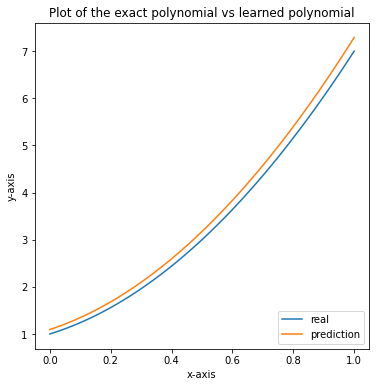

In [18]:
x_plot = np.linspace(0.0, 1.0, 100)

figure(figsize=(6,6))
plt.plot(x_plot, exact(x_plot), label = "real")
plt.plot(x_plot, model(x_plot), label = "prediction")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.title("Plot of the exact polynomial vs learned polynomial")
plt.legend(loc="lower right")
plt.show()